In [100]:
import numpy as np
# from sklearn import datasets
import torch
import torch.nn as nn
import torch.optim as optim
# import torchbnn as bnn
import matplotlib.pyplot as plt
import torch.nn.functional as F


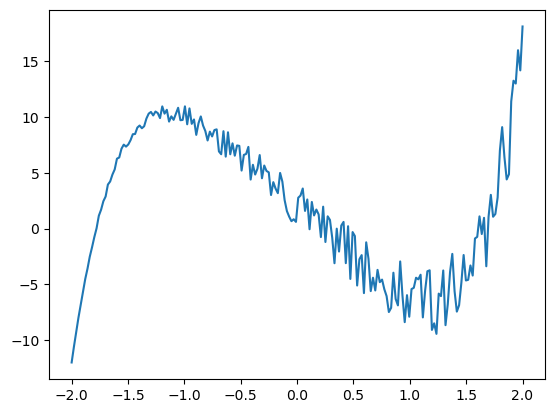

In [101]:
s = torch.linspace(-2, 2, 200)
a = torch.linspace(0, 4, 200)
s_updated =  s.pow(5) - 10 * s.pow(1) + 2 * torch.rand(s.size()) * a
x = torch.cat((torch.unsqueeze(s, dim=1), torch.unsqueeze(a, dim=1)), 1)
y = torch.unsqueeze(s_updated, dim=1)
plt.plot(s.data.numpy(), y.data.numpy())
plt.show()

In [102]:
def target(s, a):
    return  s.pow(5) - 10 * s.pow(1) + 2 * torch.rand(s.size()) * a

In [103]:
class ProbabilisticNeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ProbabilisticNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2_mean = nn.Linear(hidden_dim, output_dim)
        self.fc2_std = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        mean = self.fc2_mean(x)
        std = torch.exp(self.fc2_std(x))  # Apply exponential to ensure positive values for standard deviation
        distribution = torch.distributions.Normal(mean, std)
        return distribution, mean, std

In [104]:
model = ProbabilisticNeuralNetwork(2, 32, 1)

In [105]:
mse_loss = nn.MSELoss()
# kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)
# kl_weight = 0.01

optimizer = optim.Adam(model.parameters(), lr=0.01)

In [106]:
for step in range(2000):
    pre = model(x)
    cost = mse_loss(pre[1], y)
    # kl = kl_loss(model)
    # cost = mse + kl_weight*kl
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    print('- MSE : %f' % (cost.item()))

- MSE : 45.355907
- MSE : 44.690327
- MSE : 44.061111
- MSE : 43.456749
- MSE : 42.875904
- MSE : 42.316193
- MSE : 41.774620
- MSE : 41.246632
- MSE : 40.729679
- MSE : 40.222549
- MSE : 39.723110
- MSE : 39.229530
- MSE : 38.740211
- MSE : 38.254013
- MSE : 37.769840
- MSE : 37.287960
- MSE : 36.809189
- MSE : 36.334057
- MSE : 35.864433
- MSE : 35.402237
- MSE : 34.950268
- MSE : 34.511295
- MSE : 34.087265
- MSE : 33.679474
- MSE : 33.289589
- MSE : 32.918591
- MSE : 32.569584
- MSE : 32.245983
- MSE : 31.946890
- MSE : 31.672789
- MSE : 31.423338
- MSE : 31.198380
- MSE : 30.996269
- MSE : 30.813881
- MSE : 30.647751
- MSE : 30.493731
- MSE : 30.346157
- MSE : 30.200237
- MSE : 30.052210
- MSE : 29.898148
- MSE : 29.735744
- MSE : 29.563564
- MSE : 29.382071
- MSE : 29.192284
- MSE : 28.996147
- MSE : 28.794853
- MSE : 28.591118
- MSE : 28.386127
- MSE : 28.181919
- MSE : 27.979877
- MSE : 27.780695
- MSE : 27.584621
- MSE : 27.391163
- MSE : 27.199512
- MSE : 27.008486
- MSE : 26

In [107]:
s_test = torch.linspace(-2, 2, 100)
a_test = torch.linspace(0, 4, 100)
y_test = target(s_test, a_test)

x_test = torch.cat((torch.unsqueeze(s_test, dim=1), torch.unsqueeze(a_test, dim=1)), 1)
y_test = torch.unsqueeze(y_test, dim=1)

In [108]:
for k in range(10000):
    result = model(x_test)
mean_value = result[1].detach().numpy()
std_value =  result[2].detach().numpy()

from collections import Iterable
def flatten(lis):
     for item in lis:
         if isinstance(item, Iterable) and not isinstance(item, str):
             for x in flatten(item):
                 yield x
         else:        
             yield item

std_lower = list(flatten(mean_value - 3.0 * std_value))
std_upper = list(flatten(mean_value + 3.0 * std_value))


             

Text(0, 0.5, 'y')

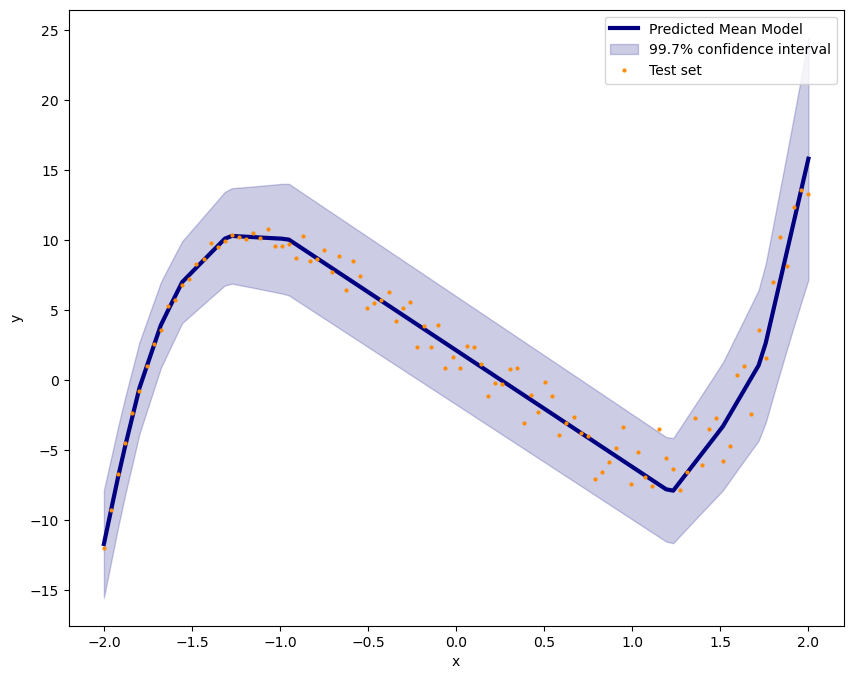

In [109]:
plt.figure(figsize=(10,8))
plt.plot(s_test.data.numpy(), mean_value,color='navy', lw=3, label='Predicted Mean Model')
# plt.fill_between(x_test.data.numpy().T[0], std_lower, std_upper, alpha=0.2, color='navy', label='99.7% confidence interval')
plt.fill_between(s_test.data.numpy(), std_lower, std_upper, alpha=0.2, color='navy', label='99.7% confidence interval')
plt.plot(s_test.data.numpy(), y_test.data.numpy(), '.', color='darkorange', markersize=4, label='Test set')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')